![](https://img.shields.io/badge/PO.DAAC-Contribution-%20?color=grey&labelColor=blue)

> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/datasets/Localmachine_SWOT_Oceanography.ipynb).

# Download and Access L2 SWOT Oceanography Data

## Summary
This notebook will show direct download of PO.DAAC archived products onto your local machine. In this demo, we will showcase the usage of SWOT Level 2 Low Rate products from Version C of the data, aka 2.0:

1. **SWOT Level 2 KaRIn Low Rate Sea Surface Height Data Product** - shortname `SWOT_L2_LR_SSH_2.0`
2. **SWOT Level 2 Nadir Altimeter Interim Geophysical Data Record with Waveforms  - SSHA Version C** - shortname `SWOT_L2_NALT_IGDR_SSHA_2.0` 
    - This is a subcollection of the parent collection: `SWOT_L2_NALT_IGDR_2.0`
3. **SWOT Level 2 Radiometer Data Products** - overview of all

We will download the data and load a time series made of multiple netCDF files into a single xarray dataset.

### Requirements

Local compute environment e.g. laptop, server: this tutorial can be run on your local machine.

## Learning Objectives
* authenticate for `earthaccess` Python Library using your NASA Earthdata Login
* access DAAC data by downloading directly into your local machine and operating on those files.
* plot the first time step in the data

### Import Libraries

In [1]:
import xarray as xr
import s3fs
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import earthaccess
from earthaccess import Auth, DataCollections, DataGranules, Store
%matplotlib inline

### Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up. We use earthaccess to authenticate your login credentials below.

In [2]:
auth = earthaccess.login()

## 1. **SWOT Level 2 KaRIn Low Rate Sea Surface Height Data Product**

Outlined below is a map of the different KaRIn Data Products we host at PO.DAAC and their sub collections, and why you may choose one over the other. For more information, see the [SWOT Data User Handbook](https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-docs/web-misc/swot_mission_docs/D-109532_SWOT_UserHandbook_20240502.pdf).

![](https://raw.githubusercontent.com/podaac/tutorials/master/images/SWOT_LR_explanations/SWOT_LR_KaRIn.png)

Once you've picked the dataset you want to look at, you can enter its shortname or subcollection below in the search query.

### Search and Download Data!

It's time to find our data! Below we are searching using `earthaccess` Python library.

In [3]:
#retrieves granule from the day we want
karin_results = earthaccess.search_data(short_name = 'SWOT_L2_LR_SSH_2.0', 
                                        temporal = ("2024-02-01 12:00:00", "2024-02-01 19:43:00"), 
                                        granule_name = '*Expert*')  # filter by files with "Expert" in file name. This collection has subcollections of 'Basic', 'Windwave', 'Unsmoothed' and 'Expert' granules.

Granules found: 10


In [4]:
earthaccess.download(karin_results, "./data_downloads/SWOT_files", provider='POCLOUD')

 Getting 10 granules, approx download size: 0.32 GB
Accessing cloud dataset using dataset endpoint credentials: https://archive.swot.podaac.earthdata.nasa.gov/s3credentials
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_210_20240201T113157_20240201T122325_PIC0_01.nc
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_211_20240201T122324_20240201T131449_PIC0_01.nc
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_212_20240201T131459_20240201T140619_PIC0_01.nc
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_213_20240201T140618_20240201T145746_PIC0_01.nc
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_214_20240201T145745_20240201T154830_PIC0_01.nc
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_215_20240201T154954_20240201T164039_PIC0_01.nc
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_216_20240201T164038_20240201T173206_PIC0_01.nc
Downloaded: data_downloads/SWOT_files/SWOT_L2_LR_S

[PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_210_20240201T113157_20240201T122325_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_211_20240201T122324_20240201T131449_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_212_20240201T131459_20240201T140619_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_213_20240201T140618_20240201T145746_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_214_20240201T145745_20240201T154830_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_215_20240201T154954_20240201T164039_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_216_20240201T164038_20240201T173206_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_217_20240201T173205_20240201T182333_PIC0_01.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert_010_218_20240201T182332_2024

In [5]:
#load downloaded data into dataset to be used for plotting
ds = xr.open_mfdataset("./data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert*.nc", combine='nested', concat_dim="num_lines", decode_times=False)
ds

<xarray.Dataset> Size: 4GB
Dimensions:                                (num_lines: 98660, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 789kB dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 789kB dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/98)
    time                                   (num_lines) float64 789kB dask.array<chunksize=(9866,), meta=np.ndarray>
    time_tai                               (num_lines) float64 789kB dask.array<chunksize=(9866,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_qual                         (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ...                                     ...
    swh_ssb_cor_source                     (num_lines, num_pixels) float32 27MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    swh_ssb_cor_source_2                   (num_lines, num_pixels) float32 27MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source              (num_lines, num_pixels) float32 27MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source_2            (num_lines, num_pixels) float32 27MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    volumetric_correlation                 (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    volumetric_correlation_uncert          (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   CNES
    source:                                        Ka-band radar interferometer
    history:                                       2024-02-03T22:27:17Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       76.4772191457865
    ssha_variance:                                 0.4263933333980923
    references:                                    V1.2.1
    equator_longitude:                             -5.36

### Cross Over Calibration Correction

In order to get the corrected SSHA, we must compute a new column like the following:

In [6]:
ds['ssha_karin_corrected'] = ds.ssha_karin + ds.height_cor_xover
ds.ssha_karin_corrected

<xarray.DataArray 'ssha_karin_corrected' (num_lines: 98660, num_pixels: 69)> Size: 54MB
dask.array<add, shape=(98660, 69), dtype=float64, chunksize=(9866, 69), chunktype=numpy.ndarray>
Coordinates:
    latitude         (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    longitude        (num_lines, num_pixels) float64 54MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    latitude_nadir   (num_lines) float64 789kB dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir  (num_lines) float64 789kB dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels

### Plot
Now let's plot a variable (`ssha_karin_corrected`) from these 10 files in a chosen projection.

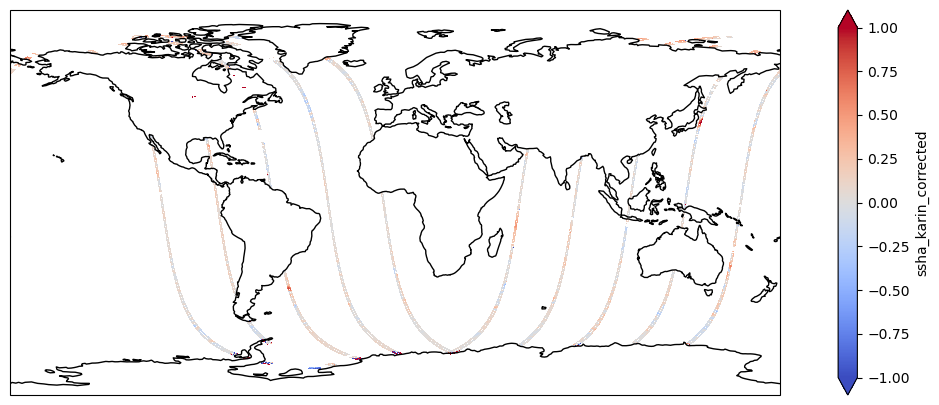

In [7]:
plt.figure(figsize=(15, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.ssha_karin_corrected.plot.pcolormesh(
 ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", vmin = -1, vmax=1, cmap='coolwarm', add_colorbar=True
)
ax.coastlines()

## 2. **SWOT Level 2 Nadir Altimeter Interim Geophysical Data Record with Waveforms - SSHA Version 2.0**

Outlined below is a map of the different Nadir Data Products we host at PO.DAAC and their sub collections, and why you may choose one over the other. For more information, see the [SWOT Data User Handbook](https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-docs/web-misc/swot_mission_docs/D-109532_SWOT_UserHandbook_20240502.pdf).

![](https://raw.githubusercontent.com/podaac/tutorials/master/images/SWOT_LR_explanations/SWOT_LR_Nadir.png)

Once you've picked the dataset you want to look at, you can enter its shortname or subcollection below in the search query.

### Search and Download Data!

Below we are searching using `earthaccess` Python library.

In [8]:
#retrieves granule from the day we want
nadir_results = earthaccess.search_data(short_name = 'SWOT_L2_NALT_IGDR_SSHA_2.0', temporal = ("2024-01-30 12:00:00", "2024-01-30 19:43:00"))

Granules found: 10


In [9]:
earthaccess.download(nadir_results, "./data_downloads/SWOT_files")

 Getting 10 granules, approx download size: 0.0 GB
Accessing cloud dataset using dataset endpoint credentials: https://archive.swot.podaac.earthdata.nasa.gov/s3credentials
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_154_20240130_113056_20240130_122223.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_155_20240130_122223_20240130_131350.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_156_20240130_131350_20240130_140516.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_157_20240130_140516_20240130_145643.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_158_20240130_145643_20240130_154810.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_159_20240130_154810_20240130_163937.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_160_20240130_163937_20240130_173104.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_161_20240130_173104_20240130_182230.nc
Downloaded: data_downloads/SWOT_files/SWOT_IPR_2PfP010_162_20240130_182230_2

[PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_154_20240130_113056_20240130_122223.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_155_20240130_122223_20240130_131350.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_156_20240130_131350_20240130_140516.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_157_20240130_140516_20240130_145643.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_158_20240130_145643_20240130_154810.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_159_20240130_154810_20240130_163937.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_160_20240130_163937_20240130_173104.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_161_20240130_173104_20240130_182230.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_162_20240130_182230_20240130_191357.nc'),
 PosixPath('data_downloads/SWOT_files/SWOT_IPR_2PfP010_163_20240130_191357_20240130_200524.nc')]

In [10]:
#load downloaded data into dataset to be used for plotting
ds_nadir = xr.open_mfdataset("./data_downloads/SWOT_files/SWOT_IPR_*.nc", combine='nested', concat_dim="time", decode_times=False, engine='h5netcdf', group='data_01')
ds_nadir

<xarray.Dataset> Size: 6MB
Dimensions:                            (time: 27927)
Coordinates:
  * time                               (time) float64 223kB 7.599e+08 ... 7.6...
    latitude                           (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
    longitude                          (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
Data variables: (12/31)
    time_tai                           (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
    surface_classification_flag        (time) float32 112kB dask.array<chunksize=(2806,), meta=np.ndarray>
    rad_side_1_surface_type_flag       (time) float32 112kB dask.array<chunksize=(2806,), meta=np.ndarray>
    rad_side_2_surface_type_flag       (time) float32 112kB dask.array<chunksize=(2806,), meta=np.ndarray>
    alt_qual                           (time) float32 112kB dask.array<chunksize=(2806,), meta=np.ndarray>
    rad_qual                           (time) float32 112kB dask.array<chunksize=(2806,), meta=np.ndarray>
    ...                                 ...
    pole_tide                          (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
    internal_tide_hret                 (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
    wind_speed_alt                     (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
    wind_speed_alt_mle3                (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
    rad_water_vapor                    (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>
    rad_cloud_liquid_water             (time) float64 223kB dask.array<chunksize=(2806,), meta=np.ndarray>

### Plot

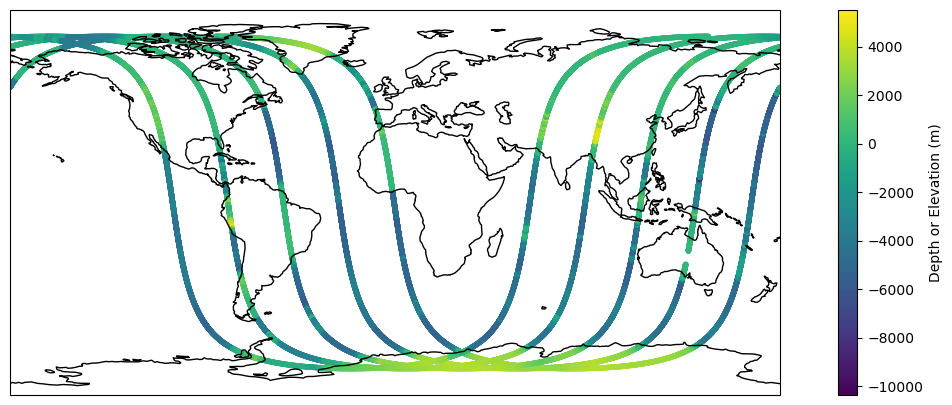

In [11]:
plt.figure(figsize=(15, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.scatter(x=ds_nadir.longitude, y=ds_nadir.latitude, c=ds_nadir.depth_or_elevation, marker='.')
plt.colorbar().set_label('Depth or Elevation (m)')

## 3. **SWOT Level 2 Radiometer Datasets**

Outlined below is a map of the different Radiometer Data Products we host at PO.DAAC, and why you may choose one over the other. For more information, see the [SWOT Data User Handbook](https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-docs/web-misc/swot_mission_docs/D-109532_SWOT_UserHandbook_20240502.pdf).

![](https://raw.githubusercontent.com/podaac/tutorials/master/images/SWOT_LR_explanations/SWOT_LR_Radiometer.png)


Once you've picked the dataset you want to look at, you can search and visualize this dataset in a workflow similar to the above datasets.

## A final word...

Accessing data completely in memory are affected by various things. Tools like xarray make a lot of assumptions about how to open and read a file. Sometimes the internals don't fit the xarray 'mould' and we need to continue to work with data providers and software providers to make these two sides work together. Level 2 data (non-gridded), specifically, suffers from some of the assumptions made.